In [25]:
import pickle
import copy
import matplotlib.pyplot as plt

In [26]:
with open("AB.pickle", 'rb') as handle:
    ab = pickle.load(handle)


In [27]:
new_ab = {}
#A segment
for x in range(0, int(len(ab)/2)):
    new_k = int(len(ab)/2)+x
    new_ab[new_k] = copy.deepcopy(ab[x])
    new_ab[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_ab[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0

new_ab.update({k:v for k,v in ab.items() if k in range(0, int(len(ab)/2))})

In [28]:
#B segment
for x in range(int(len(ab)/2), int(len(ab))):
    new_k = len(ab)+x
    new_ab[new_k] = copy.deepcopy(ab[x])
    new_ab[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_ab[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_ab[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0
    
new_ab.update({k+int(len(ab)/2):v for k,v in ab.items() if k in range(int(len(ab)/2), int(len(ab)))})

In [29]:
with open("CD.pickle", 'rb') as handle:
    cd = pickle.load(handle)

In [30]:
new_cd = {}
#C segment
for x in range(0, int(len(cd)/2)):
    new_k = int(len(cd)/2)+x
    new_cd[new_k] = copy.deepcopy(cd[x])
    new_cd[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_cd[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0

new_cd.update({k:v for k,v in cd.items() if k in range(0, int(len(cd)/2))})

In [31]:
#D segment
for x in range(int(len(cd)/2), int(len(cd))):
    new_k = len(cd)+x
    new_cd[new_k] = copy.deepcopy(cd[x])
    new_cd[new_k]['general_battery_parameters']["graphite_type"] = 'natural'
    new_cd[new_k]['material_content_pack']["anode active material (natural graphite)"] =  new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"]
    new_cd[new_k]['material_content_pack']["anode active material (synthetic graphite)"] = 0
    
new_cd.update({k+int(len(cd)/2):v for k,v in cd.items() if k in range(int(len(cd)/2), int(len(cd)))})

In [32]:
ab_sorted = {k: new_ab[k] for k in sorted(new_ab)}
cd_sorted = {k+len(ab_sorted): new_cd[k] for k in sorted(new_cd)}
dict_all = {**ab_sorted, **cd_sorted}

In [33]:
import pickle
with open('ABCD_clean.pickle', 'wb') as handle:
    pickle.dump(dict_all, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [34]:
import pandas as pd
pd.DataFrame.from_dict([dict_all[x]['general_battery_parameters'] for x in dict_all.keys()]).to_excel('3_PAR_battery_design_parameters.xlsx')
pd.DataFrame.from_dict([dict_all[x]['material_content_pack'] for x in dict_all.keys()]).to_excel('3_MC_battery_pack_materials.xlsx')

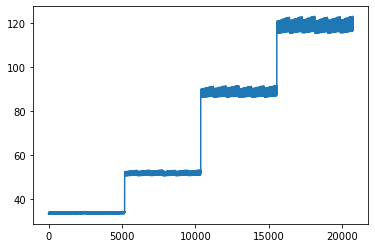

In [35]:
plt.plot([dict_all[x]['general_battery_parameters']['pack_energy_kWh'] for x in dict_all.keys()])

In [36]:
dict_all[0]['general_battery_parameters']

{'electrode_pair': 'NMC333-G (Energy)',
 'cell_capacity_ah': 37.92724283826418,
 'cell_nominal_voltage': 3.690996966053691,
 'module_capacity_ah': 113.78172851479253,
 'module_nominal_voltage': 14.763987864214764,
 'pack_capacity_ah': 113.78172851479253,
 'pack_nominal_voltage': 295.2797572842953,
 'pack_power_kW': 534.268770377432,
 'pack_energy_kWh': 33.59744117923552,
 'pack_usable_energy_kWh': 31.581594708481383,
 'power_to_energy_kw/kWh': 15.902067289208627,
 'specific_energy_cell_Wh/kg': 291.1170632995235,
 'energy_density_cell_Wh/L': 547.0666087046405,
 'specific_energy_pack_Wh/kg': 144.64459786469192,
 'energy_density_pack_Wh/L': 237.28489556331797,
 'Vehicle_range_km': 199.99999992360907,
 'cells_per_pack': 240.0,
 'cells_per_module': 12,
 'modules_per_pack': 20.0,
 'total_packs_vehicle': 1.0,
 'cell_volume': 255.89084769455275,
 'cell_group_interconnect': 4.410772241601142,
 'cells_in_parallel': 3,
 'modules_in_parallel': 1,
 'cell_series_in_module': 4.0,
 'cost_pack_heating_